# PdI TP02 - RGB to YIQ



Importing libraries and declaring functions:

In [ ]:
import PIL
from PIL import Image
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def rgb2yiq(img):
    #img as np array of (dim, dim, ..., channels)
    mat=np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
    return np.dot(img, mat.T)

def yiq2rgb(img):
    #img as np array of (dim, dim, ..., channels)
    mat = np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
    matyiq = np.dot(img, mat.T)
    return np.clip(matyiq, a_min=np.array([-1,-0.5956,-0.5225]), a_max=np.array([1,0.5956,0.5225]))

def Yalpha(img, alpha):
    #img as np array of (dim, dim, ..., channels)
    alphaed = np.copy(img)
    alphaed[:,:,0]*=alpha
    return alphaed

def IQbeta(img, beta, index):
    #img as np array of (dim, dim, ..., channels)
    betaed = np.copy(img)
    betaed[:,:,index]*=beta
    return betaed

def normalise(img):
    #img as np array
    return img/255.0

def denormalise(img):
    #img as np array
    return img*255.0


Loading sample image:

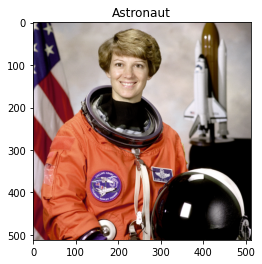

In [ ]:
#Load image
astronaut = data.astronaut() #load sample image from skimage
npastronaut = np.array(astronaut) #to numpy

plt.figure()
plt.title("Astronaut")
plt.imshow(npastronaut)
plt.show()


Image to YIQ

In [ ]:
np1n=normalise(npastronaut) #normalise image
npyiq = rgb2yiq(np1n) #to yiq

print('Y values - (max: ', np.max(npyiq[:,:,0]), '; min: ', np.min(npyiq[:,:,0]),')')
print('I values - (max: ', np.max(npyiq[:,:,1]), '; min: ', np.min(npyiq[:,:,1]),')')
print('Q values - (max: ', np.max(npyiq[:,:,2]), '; min: ', np.min(npyiq[:,:,2]),')')

Y values - (max:  0.9999999999999999 ; min:  0.0 )
I values - (max:  0.39021095294117647 ; min:  -0.07606662352941172 )
Q values - (max:  0.2229323411764706 ; min:  -0.1561301254901961 )


Interactive visualisation:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


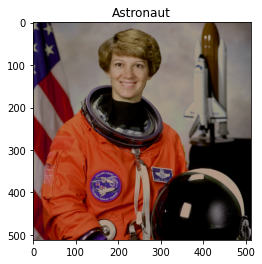

In [ ]:
#@title Interactive visualisation. { run: "auto" }
def plot(img, alpha, beta):
  #img as yiq numpy
  np2a = Yalpha(img, alpha)
  np2bi = IQbeta(np2a, beta, 1)
  np2bq = IQbeta(np2bi, beta, 2)
  nprgb = yiq2rgb(np2bq)
  nprgb2 = denormalise(nprgb)
  plt.figure()
  plt.title("Astronaut")
  plt.imshow(nprgb)
  plt.show()

alpha = 0.7 #@param {type:"slider", min:0, max:2, step:0.1}
beta = 1 #@param {type:"slider", min:0, max:2, step:0.1}
plot(npyiq, alpha, beta)

# PdI TP02 - Chromatic maps


Read elevation file

In [ ]:
import os
import math
import numpy
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

hgt_file = 'N00E010.hgt'
SAMPLES = 1201 # 1201 for SRTM3, or 3601 for the other one

def read_elevation_from_file(hgt_file, SAMPLES):
    with open(hgt_file, 'rb') as hgt_data:
        # Each data is 16bit signed integer(i2) - big endian(>)
        return np.fromfile(hgt_data, np.dtype('>i2'), SAMPLES*SAMPLES).reshape((SAMPLES, SAMPLES))

elevations = read_elevation_from_file(hgt_file, SAMPLES)

Plot elevation according to a given palette

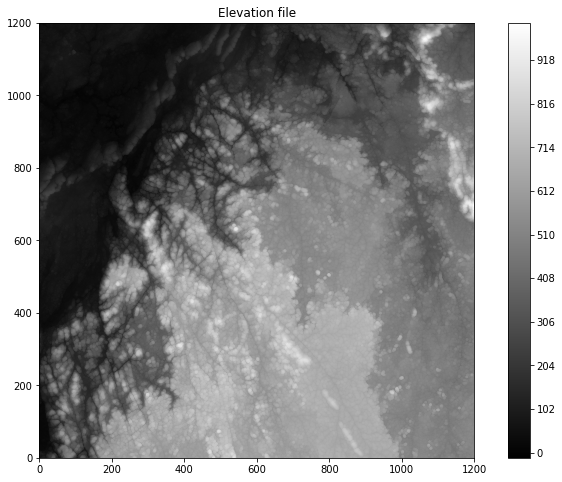

In [ ]:
#Plot out data with Matplotlib's 'contour'
#@title Interactive visualisation. { run: "auto" }
def plot(img, palette="viridis"):
  fig = plt.figure(figsize = (12, 8))
  ax = fig.add_subplot(111)
  plt.contour(img, cmap = palette, levels = list(range(np.min(img), np.max(img), 1)))
  plt.title("Elevation file")
  cbar = plt.colorbar()
  plt.gca().set_aspect('equal', adjustable='box')
  plt.show()

palette = 'gray' #@param ["viridis", "plasma", "inferno", "magma", "gray"]
plot(elevations, palette)